# Topo - Concatenant two layers stored in geopakages
O.Kaufmann, 2021.

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

## Read the layers into geodataframes

In [2]:
gdf_2 = gpd.read_file('./data_gis/ft2.gpkg', layer='landmarks')

In [3]:
gdf_3 = gpd.read_file('./data_gis/ft3.gpkg', layer='landmarks')

## Plot the two layers in separate axes

<AxesSubplot:>

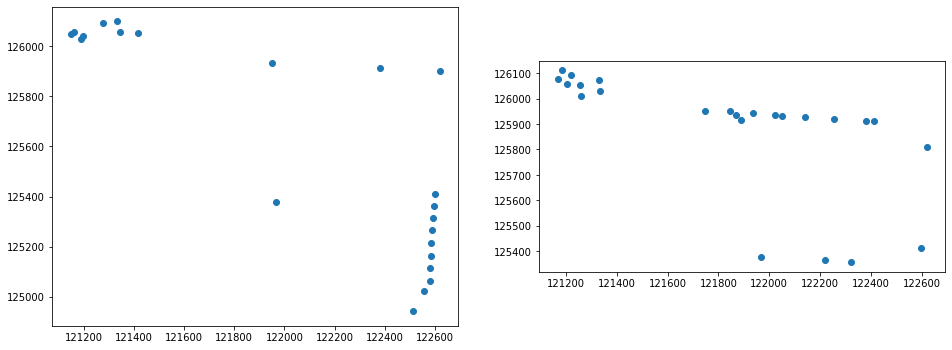

In [4]:
fig, ax = plt.subplots(ncols=2, figsize=(16,8))
gdf_2.plot(ax=ax[0])
gdf_3.plot(ax=ax[1])

## Plot the two layers in the same axis

<AxesSubplot:>

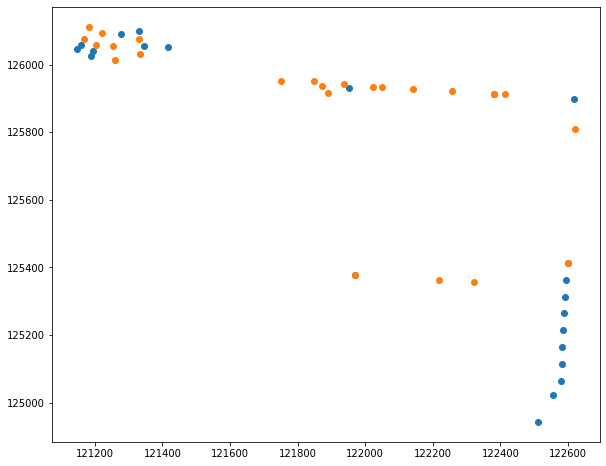

In [5]:
fig, ax = plt.subplots(figsize=(16,8))
gdf_2.plot(ax=ax)
gdf_3.plot(ax=ax)

In [6]:
gdf_2.query('landmark=="L045"')

,landmark,positioning,year,geometry
4,L045,GPS,2021,POINT (122583.565 125163.235)


## Clean the second layer and fix the landmark name

In [17]:
gdf_3.dropna(axis='index', inplace=True)

In [31]:
gdf_3['landmark'] = gdf_3['landmark'].apply(lambda x: f'L{x}')

In [36]:
gdf_3

,landmark,positioning,year,geometry
0,L001,GPS,2021.0,POINT (121184.037 126112.105)
1,L002,GPS,2021.0,POINT (121219.870 126094.263)
2,L003,GPS,2021.0,POINT (121203.004 126058.071)
3,L004,GPS,2021.0,POINT (121167.300 126075.999)
4,L050,GPS,2021.0,POINT (122599.237 125412.080)
5,L009,GPS,2021.0,POINT (122619.580 125809.708)
6,L090,GPS,2021.0,POINT (121890.166 125914.780)
7,L091,GPS,2021.0,POINT (121871.364 125935.615)
8,L051,GPS,2021.0,POINT (121968.549 125376.939)
9,L006,GPS,2021.0,POINT (121258.614 126012.355)


## Concatenate the two layers

In [8]:
gdf = pd.concat([gdf_2, gdf_3])

## Check the crs

In [10]:
gdf.crs

<Projected CRS: EPSG:31370>
Name: Belge 1972 / Belgian Lambert 72
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Belgium - onshore.
- bounds: (2.5, 49.5, 6.4, 51.51)
Coordinate Operation:
- name: Belgian Lambert 72
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

## Plot the output

<AxesSubplot:>

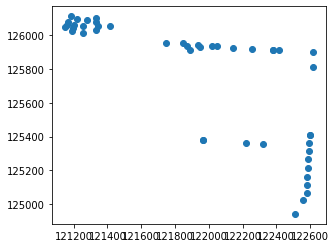

In [9]:
gdf.plot()